#Case1 :Input =1 and Output =2

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model # Functional API
from keras.models import Sequential # Sequential API
from keras.layers import *

In [3]:
# input =1
x =Input(shape =(3,))

In [4]:
x

<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'input_1')>

In [6]:
hidden1 = Dense(64,activation ='relu')(x)  # In functional api input will be given outside
hidden2 = Dense(64,activation ='relu')(hidden1)  # hl2 is connected hl1
hidden3 = Dense(64,activation ='relu')(hidden2)  # hl3 is connected hl2, if we want we can change as per our wish

output1 =Dense(1,activation ='linear')(hidden3)     # regression output
output2 = Dense(1,activation ='sigmoid')(hidden3)   # for binary class output(cat or dog only one output)
output3 = Dense(10,activation = 'softmax')(hidden3)  # multiclass output


In [8]:
#model =Model(inputs=inputs, outputs=outputs)

model =Model(inputs =x, outputs =[output1,output2,output3])

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 dense_5 (Dense)             (None, 64)                   256       ['input_1[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 64)                   4160      ['dense_5[0][0]']             
                                                                                                  
 dense_7 (Dense)             (None, 64)                   4160      ['dense_6[0][0]']             
                                                                                              

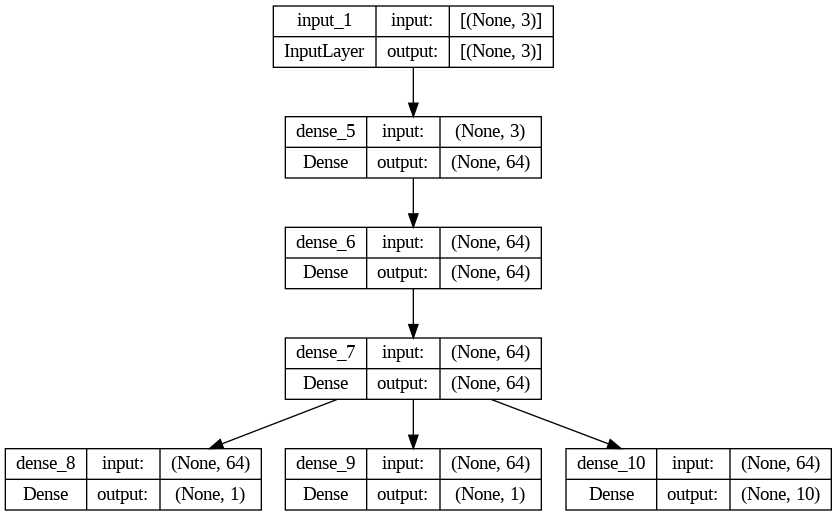

In [11]:
# visulaize the above structure

from keras.utils import plot_model
plot_model(model,show_shapes =True)

# Case2 :input =3, output =1

In [12]:
input1 =Input(shape =(32,))
input2 =Input(shape=(64,))
input3 = Input(shape = (128,))


In [13]:
# the first branch operats on the first input dataset
#input1 connected with 3 hidden layers

x =Dense(128,activation ='relu')(input1) #HL1 in 1st input
x1 =Dense(64,activation ='relu')(x)      #HL2 in 1st input
x2 =Dense(32,activation ='relu')(x1)     #HL3 in 1st input


In [15]:
# the second branch operates on the second input dataset
# input2 connected with 2 hidden layers

y = Dense(64,activation ='relu')(input2)
y1 = Dense(32,activation ='relu')(y)

In [16]:
# the third branch operats on the third input dataset
#input1 connected with 4 hidden layers

z =Dense(128,activation ='relu')(input3)
z1 =Dense(64,activation ='relu')(z)
z2 =Dense(32,activation ='relu')(z1)
z3 =Dense(32,activation ='relu')(z2)


In [17]:
# combine the output/required of three branches

combine = concatenate([x2,y1,z3])

In [22]:
# Now apply a FC layers and find the regression prediction on the combine output

m = Dense(256,activation ='relu')(combine)
m1 =Dense(1, activation ='linear')(m)

# connect with Functional API

model =Model(inputs=[input1,input2,input3],outputs =m1)
model.summary()



Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 32)]                 0         []                            
                                                                                                  
 dense_16 (Dense)            (None, 128)                  16512     ['input_4[0][0]']             
                                                                                                  
 dense_11 (Dense)            (None, 32)                   1056      ['input_2[0][0]']             
                                                                                            

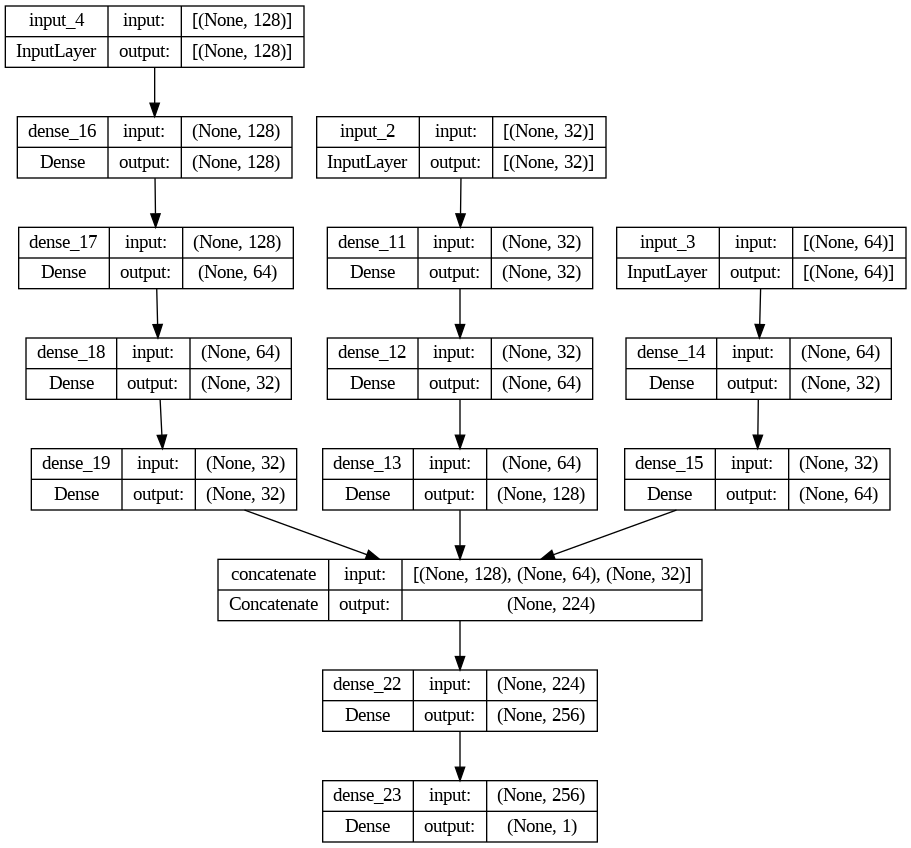

In [23]:
plot_model(model,show_shapes =True)

# Kaggle Project :https://www.kaggle.com/datasets/jangedoo/utkface-new

# UTKFace

In [25]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [26]:
!kaggle datasets download -d jangedoo/utkface-new

100% 331M/331M [00:17<00:00, 19.6MB/s]
100% 331M/331M [00:17<00:00, 19.4MB/s]


In [27]:
import zipfile
zip =zipfile.ZipFile('/content/utkface-new.zip')
zip.extractall('/content')
zip.close()

In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

In [30]:
folder_path ='/content/utkface_aligned_cropped/UTKFace'
folder_path

'/content/utkface_aligned_cropped/UTKFace'

# Predict - Age,Gender & Ethnicity

 #Age - Regression pb
 #Gender - Binary Classfication pb
 #Ethnicity -Multiclassification pb

In [38]:
age = []
gender = []
ethnicity = []
img_path = []

for file in os.listdir(folder_path):  # to acces each file in specified folder and its path
  age.append(int(file.split('_')[0]))
  gender.append(int(file.split('_')[1]))
  img_path.append(file)



In [39]:
age

[40,
 28,
 40,
 26,
 24,
 1,
 37,
 26,
 27,
 39,
 13,
 48,
 40,
 30,
 20,
 3,
 23,
 54,
 25,
 34,
 37,
 42,
 38,
 50,
 24,
 35,
 54,
 35,
 1,
 36,
 23,
 40,
 35,
 90,
 4,
 55,
 26,
 31,
 27,
 1,
 59,
 82,
 32,
 41,
 1,
 16,
 3,
 28,
 30,
 90,
 21,
 3,
 18,
 45,
 45,
 1,
 30,
 13,
 55,
 71,
 2,
 50,
 26,
 26,
 58,
 32,
 63,
 30,
 26,
 29,
 33,
 29,
 62,
 28,
 28,
 17,
 50,
 43,
 80,
 7,
 28,
 26,
 8,
 30,
 1,
 26,
 18,
 14,
 25,
 32,
 28,
 73,
 27,
 55,
 23,
 35,
 21,
 27,
 41,
 27,
 37,
 35,
 75,
 36,
 40,
 31,
 1,
 33,
 27,
 24,
 35,
 32,
 72,
 61,
 15,
 2,
 49,
 56,
 4,
 27,
 45,
 18,
 10,
 22,
 26,
 12,
 22,
 1,
 27,
 36,
 27,
 45,
 24,
 60,
 26,
 7,
 1,
 21,
 26,
 50,
 26,
 29,
 32,
 1,
 24,
 42,
 46,
 27,
 20,
 50,
 30,
 26,
 2,
 30,
 1,
 37,
 21,
 40,
 25,
 24,
 28,
 26,
 22,
 26,
 72,
 22,
 21,
 76,
 56,
 24,
 30,
 80,
 37,
 18,
 39,
 29,
 14,
 2,
 26,
 26,
 32,
 31,
 13,
 10,
 5,
 1,
 28,
 12,
 54,
 80,
 32,
 21,
 25,
 34,
 26,
 28,
 2,
 35,
 4,
 36,
 26,
 78,
 28,
 1,
 41,
 66

In [40]:
len(age)

23708

In [41]:
gender

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,


In [42]:
len(gender)

23708

In [43]:
df = pd.DataFrame({'age':age,'gender':gender,'img_path':img_path})

In [44]:
df

,age,gender,img_path
0,40,0,40_0_3_20170119204122502.jpg.chip.jpg
1,28,0,28_0_0_20170105162616443.jpg.chip.jpg
2,40,0,40_0_0_20170113135437140.jpg.chip.jpg
3,26,0,26_0_0_20170113210319156.jpg.chip.jpg
4,24,0,24_0_2_20170116164209154.jpg.chip.jpg
...,...,...,...
23703,4,0,4_0_0_20170104010859393.jpg.chip.jpg
23704,27,1,27_1_4_20170112234325680.jpg.chip.jpg
23705,30,0,30_0_3_20170117181147603.jpg.chip.jpg
23706,40,0,40_0_1_20170117170545162.jpg.chip.jpg


In [45]:
df.shape

(23708, 3)

## split the data into   train and test

In [46]:
train_df = df.sample(frac=1, random_state =0).iloc[0:20000] # instead of regular method, here iam taking in sequence order(our wish)
test_df = df.sample(frac =1, random_state =0).iloc[20000:]

In [47]:
print(train_df.shape, test_df.shape)

(20000, 3) (3708, 3)


In [50]:
# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=25,
                                   width_shift_range=0.2, height_shift_range=0.2,
                                 zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255,rotation_range=25,
                                   width_shift_range=0.2, height_shift_range=0.2,
                                 zoom_range=0.2,horizontal_flip=True)

# scaling is mandatory in cnn and DNN

In [53]:
# Apply data augmentation with original dataset

train_generator =train_datagen.flow_from_dataframe(train_df,directory =folder_path,
                                                   x_col ='img_path',y_col =['age','gender'],
                                                   target_size =(256,256),class_mode ='multi_output')

test_generator =test_datagen.flow_from_dataframe(test_df,directory =folder_path,
                                                   x_col ='img_path',y_col =['age','gender'],
                                                   target_size =(256,256),class_mode ='multi_output')

Found 20000 validated image filenames.
Found 3708 validated image filenames.


# Resnet Model -Transfer Learning

In [54]:
from keras.layers import *
from keras.models import Model
from keras.applications.resnet50 import ResNet50

# for less image dataset resnet50 is sufficient, if we millions of images then we
  # can go with resnet150

In [55]:
resnet =ResNet50(include_top =False, input_shape =(256,256,3))

94765736/94765736 [==============================] - 5s 0us/step


In [59]:
resnet =ResNet50(include_top =False, input_shape =(256,256,3))
resnet.trainable =False # it means, it is copying the entire cnn part of resnet model

OUTPUT = resnet.layers[-1].output # we are taking last layer of cnn part in resnet50 model
flatten =Flatten()(OUTPUT)

dense1 = Dense(128,activation ='relu')(flatten) # for age
dense2 = Dense(128,activation ='relu')(flatten) # for gender

dense3 = Dense(64,activation ='relu')(dense1)
dense4 = Dense(64,activation ='relu')(dense2)

output1 = Dense(1, activation ='linear', name='age')(dense3)
output2 = Dense(1,activation='sigmoid',name ='gender')(dense4)

model = Model(inputs =resnet.input, outputs =[output1, output2])




In [60]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_8[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [61]:
model.compile(optimizer ='adam',loss={'age':'mae','gender':'binary_crossentropy'},
              metrics ={'age':'mae','gender':'accuracy'},
              loss_weights = {'age':10, 'gender':90})
 # how much weight giving to predict age and weight, it is not mandatory

In [62]:
history =model.fit(train_generator,batch_size =32,epochs =5, validation_data=test_generator)


Epoch 1/5
625/625 [==============================] - 433s 670ms/step - loss: 228.0663 - age_loss: 15.4360 - gender_loss: 0.8190 - age_mae: 15.4360 - gender_accuracy: 0.5148 - val_loss: 210.2015 - val_age_loss: 14.5519 - val_gender_loss: 0.7187 - val_age_mae: 14.5519 - val_gender_accuracy: 0.4854
Epoch 2/5
625/625 [==============================] - 432s 691ms/step - loss: 212.4053 - age_loss: 15.0006 - gender_loss: 0.6933 - age_mae: 15.0006 - gender_accuracy: 0.5283 - val_loss: 210.0597 - val_age_loss: 14.7702 - val_gender_loss: 0.6929 - val_age_mae: 14.7702 - val_gender_accuracy: 0.5146
Epoch 3/5
625/625 [==============================] - 430s 688ms/step - loss: 211.4636 - age_loss: 14.9172 - gender_loss: 0.6921 - age_mae: 14.9172 - gender_accuracy: 0.5242 - val_loss: 208.9511 - val_age_loss: 14.6584 - val_gender_loss: 0.6930 - val_age_mae: 14.6584 - val_gender_accuracy: 0.5146
Epoch 4/5
625/625 [==============================] - 413s 660ms/step - loss: 210.9699 - age_loss: 14.8689 - g

# Transfer Learning

## Feature Extraction Method

## Fine Tuning Method

In [67]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import *
from keras.applications.vgg16 import VGG16

In [69]:
# Feature Extraction

cnn_base = VGG16(include_top =False, weights ='imagenet',input_shape =(150,150,3))

In [ ]:
# Fine Tuning

cnn_base.trainable =True
